In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('error', category = DeprecationWarning)
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

In [9]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace = True)
df['Insulin'].fillna(df['Insulin'].mean(), inplace = True)
df['BMI'].fillna(df['BMI'].mean(), inplace = True)

In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
corr = df.corr()

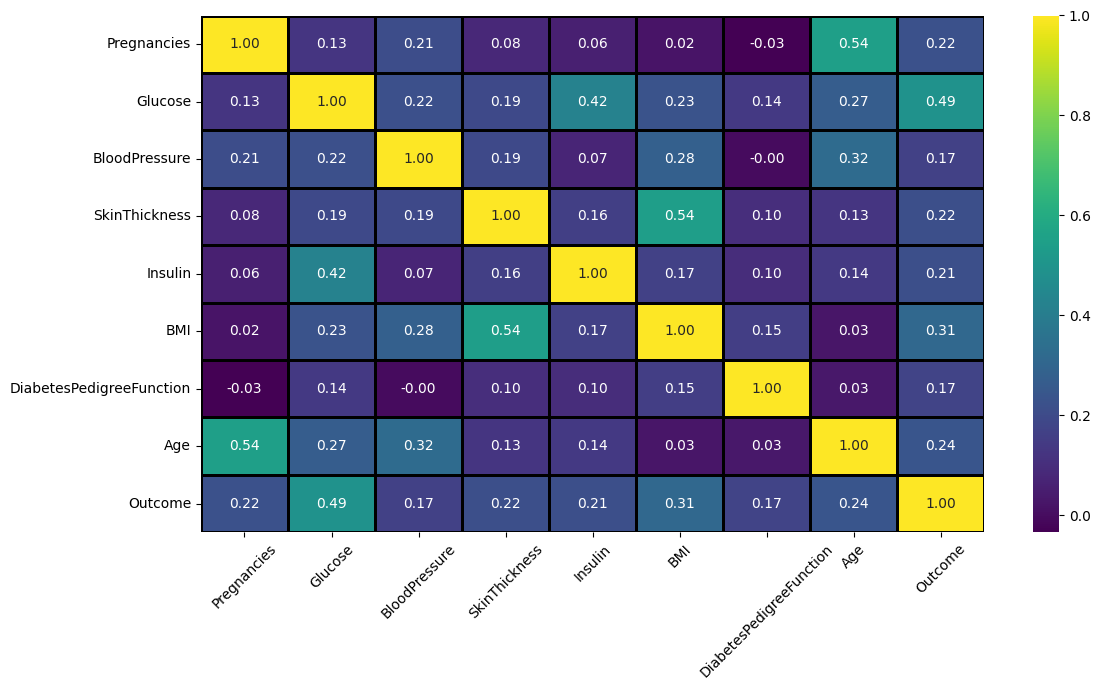

In [13]:
plt.figure(figsize = (12, 7))

sns.heatmap(corr,
            annot = True,
            cmap = 'viridis',
            fmt='.2f',
            linecolor = 'black',
            linewidths = 1
)

plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

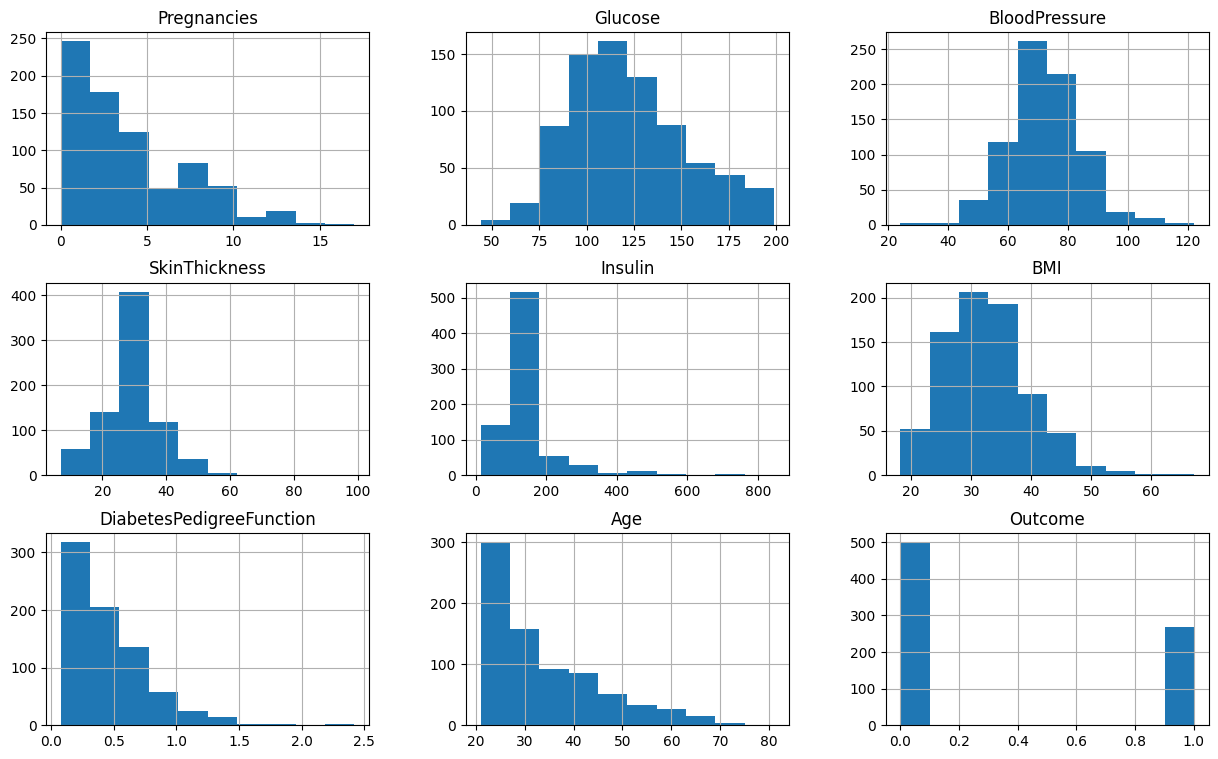

In [14]:
df.hist(figsize = (15, 9))
plt.show()

<Axes: xlabel='BMI'>

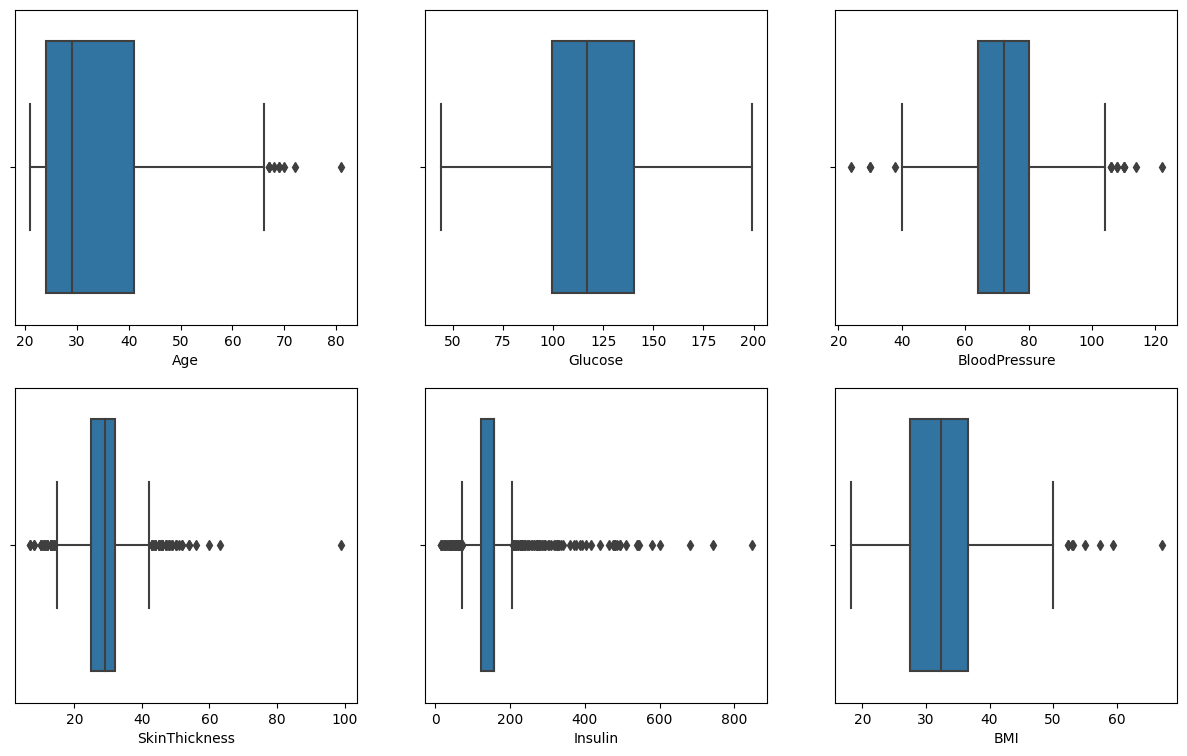

In [15]:
plt.figure(figsize = (15, 9))

plt.subplot(2, 3, 1)
sns.boxplot(x = df['Age'])
plt.subplot(2, 3, 2)
sns.boxplot(x = df['Glucose'])
plt.subplot(2, 3, 3)
sns.boxplot(x = df['BloodPressure'])
plt.subplot(2, 3, 4)
sns.boxplot(x = df['SkinThickness'])
plt.subplot(2, 3, 5)
sns.boxplot(x = df['Insulin'])
plt.subplot(2, 3, 6)
sns.boxplot(x = df['BMI'])

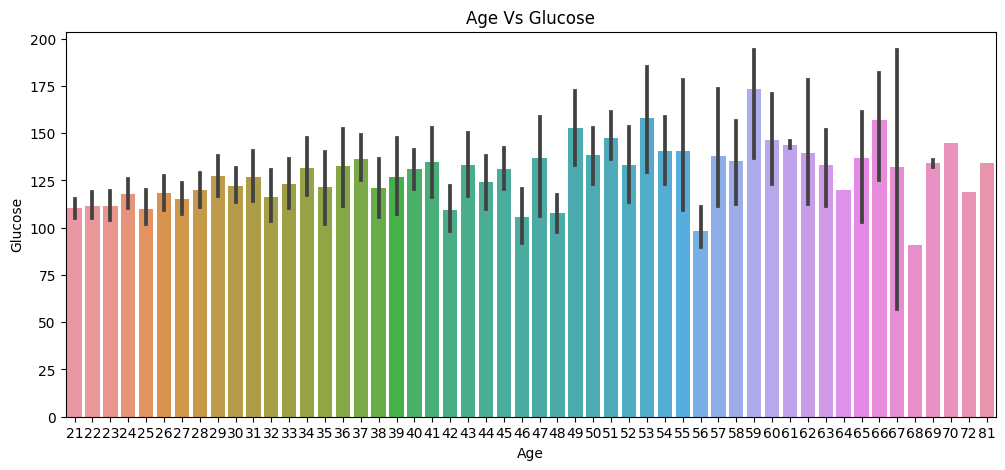

In [16]:
plt.figure(figsize = (12, 5))
sns.barplot(data = df, x = 'Age', y = 'Glucose')
plt.title('Age Vs Glucose')
plt.show()

In [17]:
age_labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '71+']

age_bins = [20, 30, 40, 50, 60, 70, 80]

df['AgeGroup'] = pd.cut(df['Age'], bins = age_bins, labels = age_labels, right = False)

df.sample(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
328,2,102.0,86.0,36.00000,120.000000,45.5,0.127,23,1,20-30
289,5,108.0,72.0,43.00000,75.000000,36.1,0.263,33,0,31-40
756,7,137.0,90.0,41.00000,155.548223,32.0,0.391,39,0,31-40
457,5,86.0,68.0,28.00000,71.000000,30.2,0.364,24,0,20-30
747,1,81.0,74.0,41.00000,57.000000,46.3,1.096,32,0,31-40
154,8,188.0,78.0,29.15342,155.548223,47.9,0.137,43,1,41-50
529,0,111.0,65.0,29.15342,155.548223,24.6,0.660,31,0,31-40
413,1,143.0,74.0,22.00000,61.000000,26.2,0.256,21,0,20-30
575,1,119.0,44.0,47.00000,63.000000,35.5,0.280,25,0,20-30
630,7,114.0,64.0,29.15342,155.548223,27.4,0.732,34,1,31-40


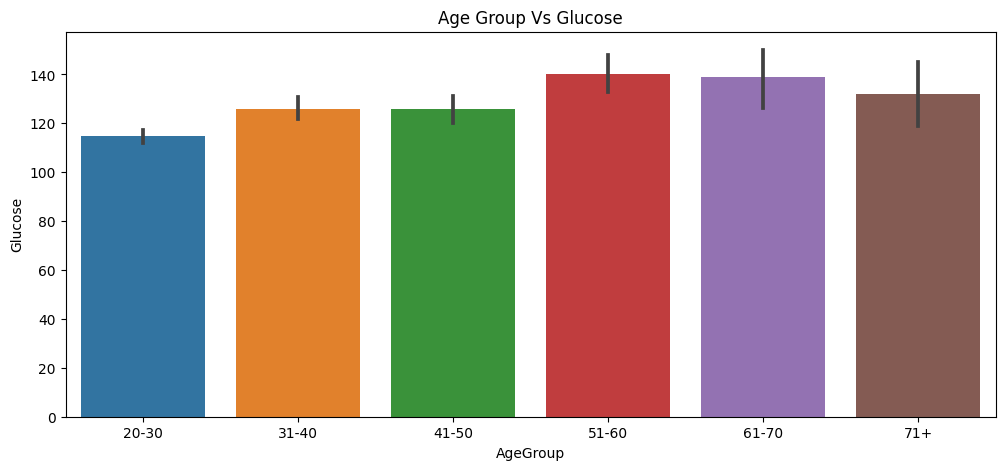

In [18]:
plt.figure(figsize = (12, 5))
sns.barplot(data = df, x = 'AgeGroup', y = 'Glucose')
plt.title('Age Group Vs Glucose')
plt.show()

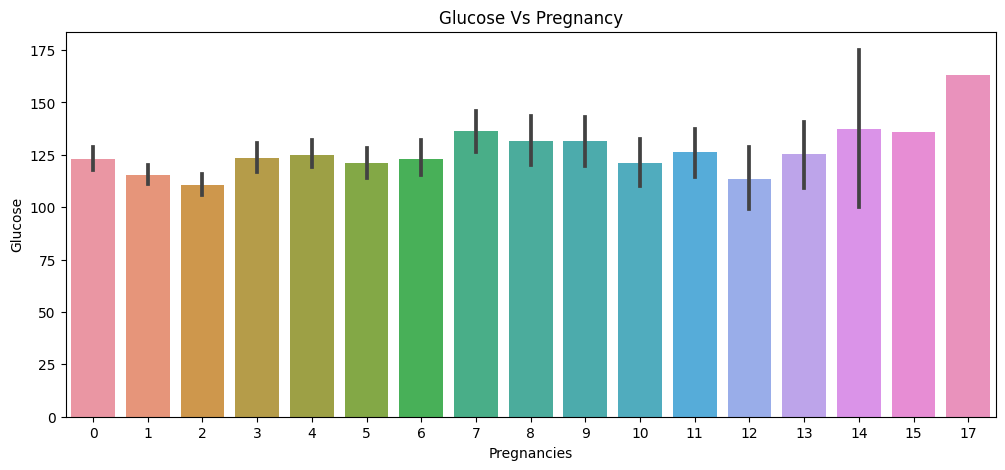

In [19]:
plt.figure(figsize = (12, 5))
sns.barplot(data = df, x = 'Pregnancies', y = 'Glucose')
plt.title('Glucose Vs Pregnancy')
plt.show()

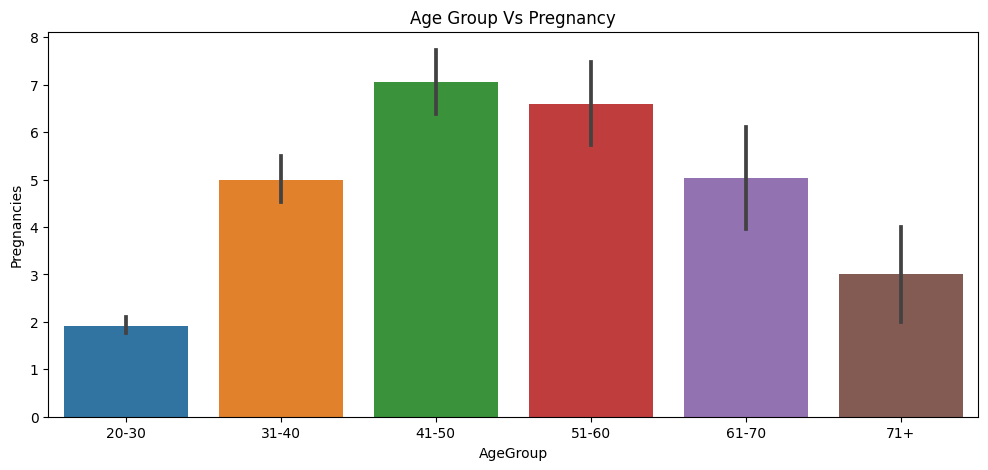

In [20]:
plt.figure(figsize = (12, 5))
sns.barplot(data = df, y = 'Pregnancies', x = 'AgeGroup')
plt.title('Age Group Vs Pregnancy')
plt.show()

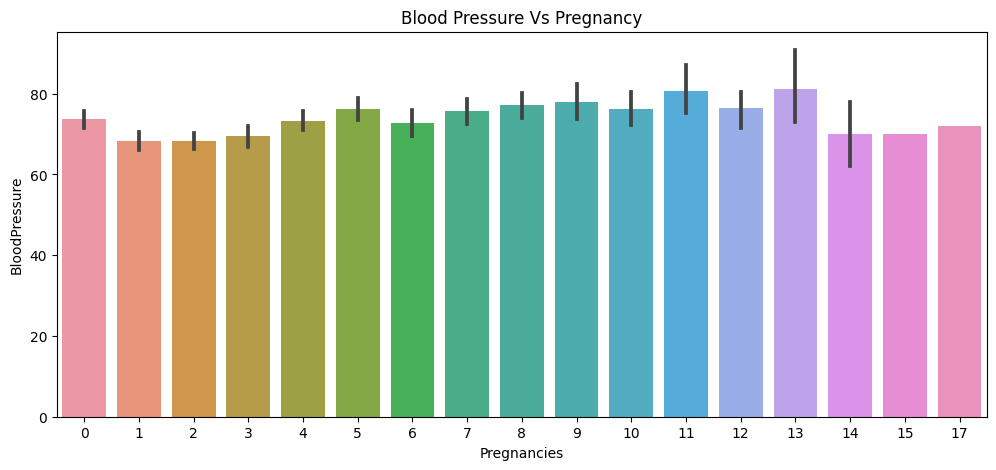

In [21]:
plt.figure(figsize = (12, 5))
sns.barplot(data = df, x = 'Pregnancies', y = 'BloodPressure')
plt.title('Blood Pressure Vs Pregnancy')
plt.show()

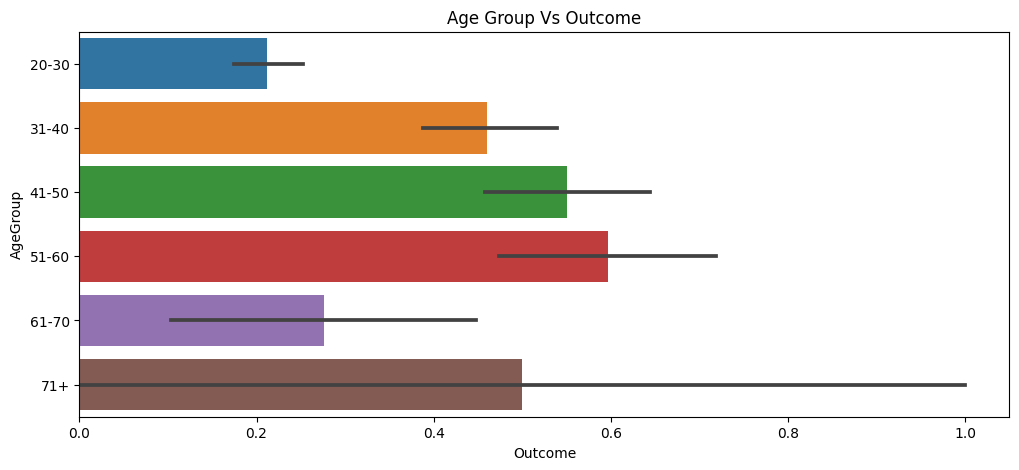

In [22]:
plt.figure(figsize = (12, 5))
sns.barplot(data = df, x = 'Outcome', y = 'AgeGroup')
plt.title('Age Group Vs Outcome')
plt.show()

In [23]:
bmi_bins = [0, 18.5, 25, 30, 35, 40, 50]  
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese Class I', 'Obese Class II', 'Obese Class III'] 

df['BMICategory'] = pd.cut(df['BMI'], bins = bmi_bins, labels = bmi_labels, right = False)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,BMICategory
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,51-60,Obese Class I
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,31-40,Overweight
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,31-40,Normal
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,20-30,Overweight
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,31-40,Obese Class III


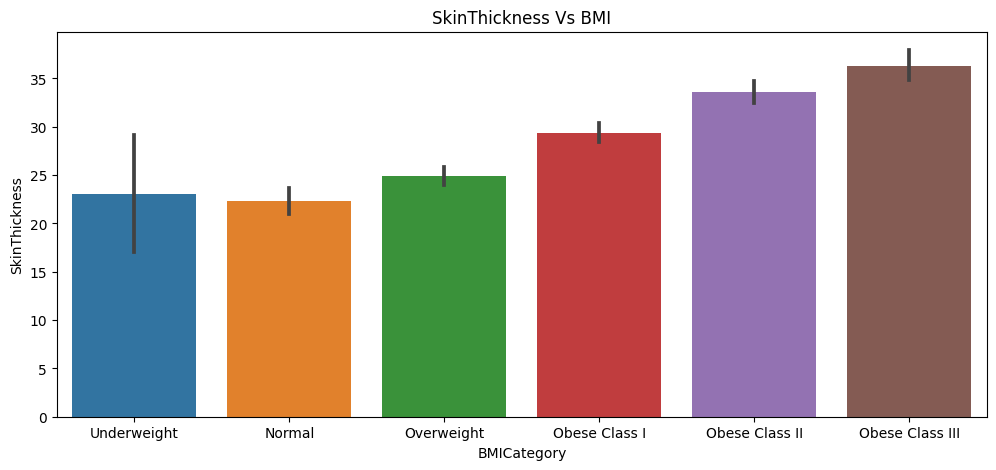

In [24]:
plt.figure(figsize = (12, 5))
sns.barplot(data = df, x = 'BMICategory', y = 'SkinThickness')
plt.title('SkinThickness Vs BMI')
plt.show()

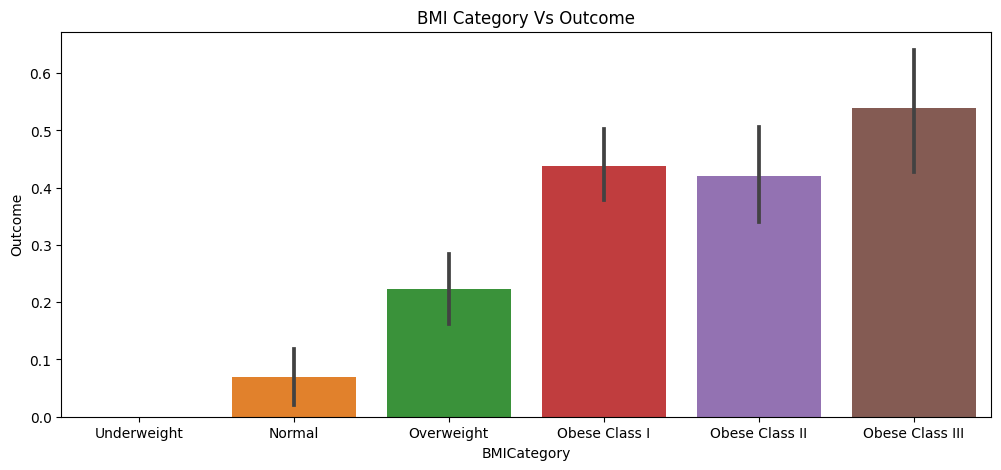

In [25]:
plt.figure(figsize = (12, 5))
sns.barplot(data = df, y = 'Outcome', x = 'BMICategory')
plt.title('BMI Category Vs Outcome')
plt.show()

In [26]:
glucose_bins = [0, 100, 150, 200]  
glucose_labels = ['Low', 'Medium', 'High'] 

df['GlucoseGroup'] = pd.cut(df['Glucose'], bins = glucose_bins, labels = glucose_labels, right = False)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,BMICategory,GlucoseGroup
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,51-60,Obese Class I,Medium
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,31-40,Overweight,Low
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,31-40,Normal,High
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,20-30,Overweight,Low
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,31-40,Obese Class III,Medium


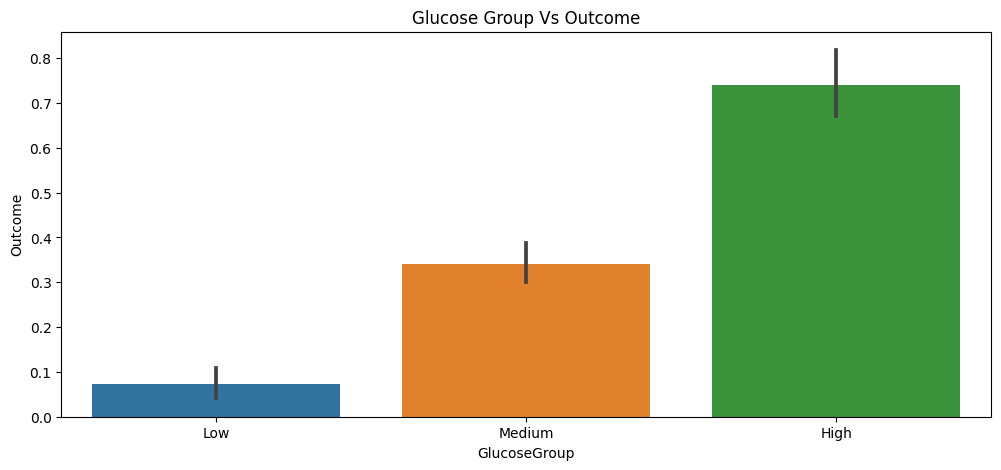

In [27]:
plt.figure(figsize = (12, 5))
sns.barplot(data = df, y = 'Outcome', x = 'GlucoseGroup')
plt.title('Glucose Group Vs Outcome')
plt.show()

In [28]:
bp_bins = [0, 60, 80, 120]  
bp_labels = ['Low', 'Normal', 'High'] 

df['BloodPressureGroup'] = pd.cut(df['BloodPressure'], bins = bp_bins, labels = bp_labels, right = False)

df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,BMICategory,GlucoseGroup,BloodPressureGroup
310,6,80.0,66.000000,30.00000,155.548223,26.2,0.313,41,0,41-50,Overweight,Low,Normal
495,6,166.0,74.000000,29.15342,155.548223,26.6,0.304,66,0,61-70,Overweight,High,Normal
286,5,155.0,84.000000,44.00000,545.000000,38.7,0.619,34,0,31-40,Obese Class II,High,High
117,5,78.0,48.000000,29.15342,155.548223,33.7,0.654,25,0,20-30,Obese Class I,Low,Low
361,5,158.0,70.000000,29.15342,155.548223,29.8,0.207,63,0,61-70,Overweight,High,Normal
697,0,99.0,72.405184,29.15342,155.548223,25.0,0.253,22,0,20-30,Overweight,Low,Normal
586,8,143.0,66.000000,29.15342,155.548223,34.9,0.129,41,1,41-50,Obese Class I,Medium,Normal
350,4,92.0,80.000000,29.15342,155.548223,42.2,0.237,29,0,20-30,Obese Class III,Low,High
183,5,73.0,60.000000,29.15342,155.548223,26.8,0.268,27,0,20-30,Overweight,Low,Normal
442,4,117.0,64.000000,27.00000,120.000000,33.2,0.230,24,0,20-30,Obese Class I,Medium,Normal


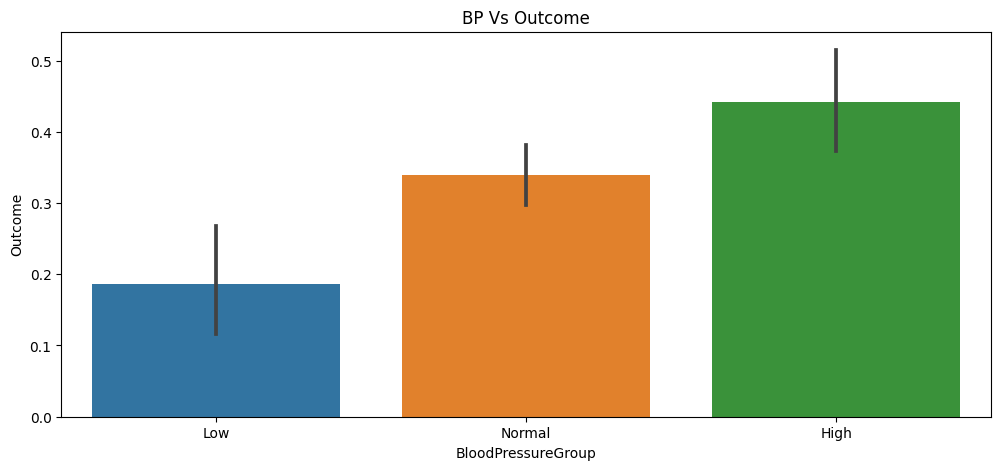

In [29]:
plt.figure(figsize = (12, 5))
sns.barplot(data = df, y = 'Outcome', x = 'BloodPressureGroup')
plt.title('BP Vs Outcome')
plt.show()

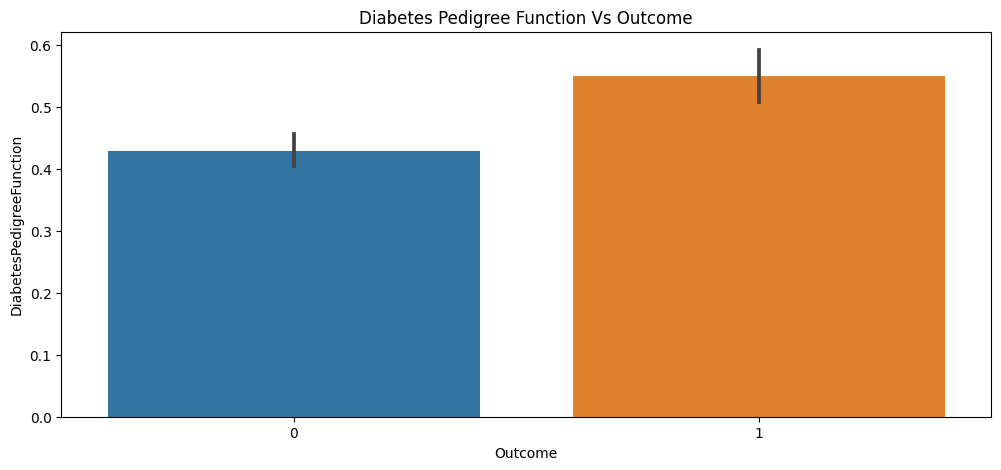

In [30]:
plt.figure(figsize = (12, 5))
sns.barplot(data = df, x = 'Outcome', y = 'DiabetesPedigreeFunction')
plt.title('Diabetes Pedigree Function Vs Outcome')
plt.show()

<Axes: xlabel='Glucose', ylabel='Insulin'>

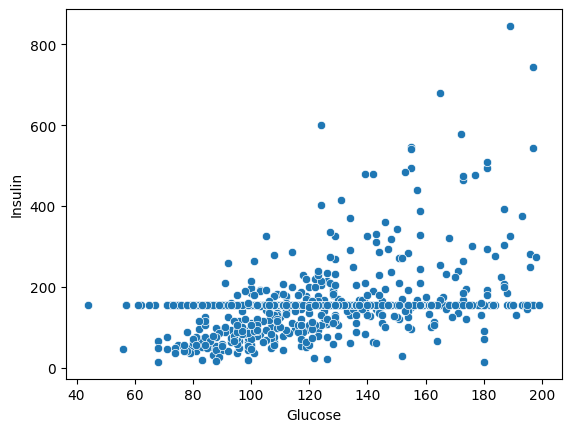

In [31]:
sns.scatterplot(x = 'Glucose', y = 'Insulin', data = df)

<Axes: xlabel='Glucose', ylabel='Insulin'>

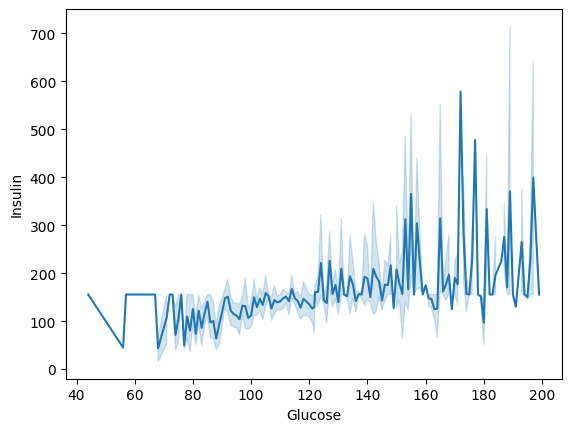

In [32]:
sns.lineplot(x = 'Glucose', y = 'Insulin', data = df)

In [33]:
X = df.drop(columns = ['Outcome', 'AgeGroup', 'BMICategory', 'GlucoseGroup', 'BloodPressureGroup'])
y = df['Outcome']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [35]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

614
154
614
154


In [36]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred) * 100)

Accuracy:  76.62337662337663


In [37]:
svc = SVC()

svc.fit(X_train, y_train)

y_pred1 = svc.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred1) * 100)

Accuracy:  75.97402597402598


In [38]:
param_grid = {
    'C': [0.1, 1, 10],            
    'kernel': ['linear', 'rbf'], 
    'gamma': [0.1, 1, 10],        
}

grid_search = GridSearchCV(estimator = svc, param_grid = param_grid, cv = 5, scoring = 'accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters: ", best_params)

Best Hyperparameters:  {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}


In [39]:
svc = SVC(C = 0.1, gamma =  0.1, kernel = 'linear')

svc.fit(X_train, y_train)

y_pred1 = svc.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred1) * 100)

Accuracy:  76.62337662337663


In [40]:
dtree = DecisionTreeClassifier(max_depth = 6, criterion = 'entropy')

dtree.fit(X_train,y_train)

y_pred2 = dtree.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred2) * 100)

Accuracy:  73.37662337662337


In [41]:
rf = RandomForestClassifier()

rf.fit(X_train,y_train)

y_pred3 = rf.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred3) * 100)

Accuracy:  76.62337662337663


In [42]:
gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)

y_pred4 = gbc.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred4) * 100)

Accuracy:  73.37662337662337


In [43]:
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

y_pred5 = knn.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred5) * 100)

Accuracy:  64.93506493506493


In [44]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],       
    'weights': ['uniform', 'distance'], 
    'p': [1, 2]                         
}

grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 5, scoring = 'accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


In [45]:
knn = KNeighborsClassifier(n_neighbors = 7, p = 1, weights = 'uniform')

knn.fit(X_train, y_train)

y_pred5 = knn.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred5) * 100)

Accuracy:  66.23376623376623


In [46]:
xgb = XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb.fit(X_train, y_train)

y_pred6 = xgb.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred6) * 100)

[19:22:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy:  70.77922077922078


In [47]:
data0 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})
data2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
data3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3})
data4 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred4})
data5 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred5})
data6 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred6})

tables = [data0, data1, data2, data3, data4, data5, data6]

for table in tables:
    display(table)

,Actual,Predicted
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
...,...,...
355,1,1
534,0,0
344,0,0
296,1,0


,Actual,Predicted
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
...,...,...
355,1,1
534,0,0
344,0,0
296,1,0


,Actual,Predicted
668,0,1
324,0,0
624,0,0
690,0,0
473,0,0
...,...,...
355,1,1
534,0,0
344,0,1
296,1,0


,Actual,Predicted
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
...,...,...
355,1,1
534,0,0
344,0,0
296,1,1


,Actual,Predicted
668,0,1
324,0,0
624,0,0
690,0,0
473,0,0
...,...,...
355,1,0
534,0,0
344,0,1
296,1,0


,Actual,Predicted
668,0,1
324,0,1
624,0,0
690,0,1
473,0,1
...,...,...
355,1,1
534,0,0
344,0,0
296,1,0


,Actual,Predicted
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
...,...,...
355,1,1
534,0,0
344,0,1
296,1,0


In [48]:
prediction_results = [y_pred, y_pred1, y_pred2, y_pred3, y_pred4, y_pred5, y_pred6]

algorithms_name = ['Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN', 'XGB']

accuracy_scores = [accuracy_score(y_test, y_pred) for y_pred in prediction_results]

data = {'Algorithm': algorithms_name,
    'Accuracy': accuracy_scores
}

accuracy_df = pd.DataFrame(data, index = [1,2,3,4,5,6,7])

accuracy_df = accuracy_df.round({'Accuracy': 3})
accuracy_df = accuracy_df.sort_values(by = 'Accuracy', ascending = False)

accuracy_df

,Algorithm,Accuracy
1,Logistic Regression,0.766
2,SVC,0.766
4,Random Forest,0.766
3,Decision Tree,0.734
5,Gradient Boosting,0.734
7,XGB,0.708
6,KNN,0.662
